In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import types

sc = pyspark.SparkContext('local[*]')

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
spark.sql("show tables").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
+--------+---------+-----------+



In [4]:
df = spark.read.load("spark-warehouse/emg_data/*.parquet")

In [6]:
df.count()

4237908

In [7]:
%matplotlib inline

In [13]:
ch1 = df.groupBy("class", "time").agg(F.mean("channel1").alias("mean_emg")).toPandas()

In [14]:
type(ch1)

pandas.core.frame.DataFrame

In [18]:
ch1.sample(5)

,class,time,mean_emg
125571,1,27204,-0.000004
245250,1,4631,-0.000003
244648,0,48004,0.000003
80937,6,45080,0.000030
274545,0,49800,-0.000039


In [21]:
ch1.dtypes

class        object
time          int32
mean_emg    float64
dtype: object

In [26]:
ch1.mean_emg.describe()

count    299938.000000
mean         -0.000008
std           0.000117
min          -0.001280
25%          -0.000031
50%          -0.000008
75%           0.000016
max           0.001270
Name: mean_emg, dtype: float64

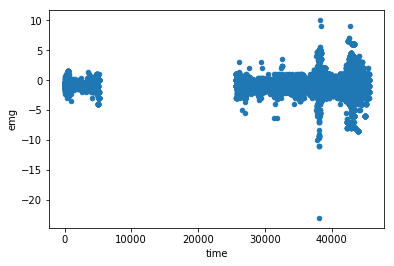

In [29]:
(
    ch1.loc[ch1["class"] == "1", ]
    .assign(emg=lambda x: x.mean_emg*1e5)
    .plot(x="time", y="emg", kind="scatter")
)